# 6.2 Exploring Relationships

# Index
## 01. Importing Libraries
## 02. Import Data
## 03. Exploring Relationships
        Question 2 & 3
            Correlation Heatmaps
        Question 4
            Scatterplots
        Question 5
            Pairplots
        Question 6
            Cat Plots

# 01. Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import matplotlib
print(matplotlib.__version__)

3.9.2


In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Import Data

In [8]:
# create path
path = r"C:\Users\kthav\My Pc\Desktop\Career Foundry\Sourcing Open Data\Final Project"

In [10]:
path

'C:\\Users\\kthav\\My Pc\\Desktop\\Career Foundry\\Sourcing Open Data\\Final Project'

In [12]:
# import merged_clean.csv as df
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'merged_clean.csv'), index_col = False)

In [14]:
# check head
df.head(10)

Unnamed: 0      Country                     Region  Happiness Rank  \
0           0  Switzerland             Western Europe               1   
1           1      Iceland             Western Europe               2   
2           2      Denmark             Western Europe               3   
3           3       Norway             Western Europe               4   
4           4       Canada              North America               5   
5           5      Finland             Western Europe               6   
6           6  Netherlands             Western Europe               7   
7           7       Sweden             Western Europe               8   
8           8  New Zealand  Australia and New Zealand               9   
9           9    Australia  Australia and New Zealand              10   

   Happiness Score  Economy (GDP per Capita)   Family  \
0            7.587                   1.39651  1.34951   
1            7.561                   1.30232  1.40223   
2            7.527                   1.32548  1.36058   
3            7.522                   1.45900  1.33095   
4            7.427                   1.32629  1.32261   
5            7.406                   1.29025  1.31826   
6            7.378                   1.32944  1.28017   
7            7.364                   1.33171  1.28907   
8            7.286                   1.25018  1.31967   
9            7.284                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   
5                   0.88911  0.64169                        0.41372   
6                   0.89284  0.61576                        0.31814   
7                   0.91087  0.65980                        0.43844   
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Year  
0     0.29678  2015  
1     0.43630  2015  
2     0.34139  2015  
3     0.34699  2015  
4     0.45811  2015  
5     0.23351  2015  
6     0.47610  2015  
7     0.36262  2015  
8     0.47501  2015  
9     0.43562  2015

In [16]:
df.shape

(782, 12)

In [18]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [20]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)


In [22]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [24]:
# rename columns to improve readability 
df.rename(columns = {'Happiness Rank' : 'H. Rank', 'Happiness Score' : 'H. Score', 'Economy (GDP per Capita)' : 'Economy', 
                     'Health (Life Expectancy)' : 'Health', 'Trust (Government Corruption)' : 'G. Trust' },
          inplace = True)

In [26]:
df.columns

Index(['Country', 'Region', 'H. Rank', 'H. Score', 'Economy', 'Family',
       'Health', 'Freedom', 'G. Trust', 'Generosity', 'Year'],
      dtype='object')

# 03. Exploring Relationships

## Question 2&3

In [30]:
# create a subset of data to exclude columns not needed for correlation ie. 'Country', 'Region', 'Year'
sub = df[['H. Score', 'Economy', 'Family','Health', 'Freedom', 'G. Trust', 'Generosity']]

In [32]:
sub.columns

Index(['H. Score', 'Economy', 'Family', 'Health', 'Freedom', 'G. Trust',
       'Generosity'],
      dtype='object')

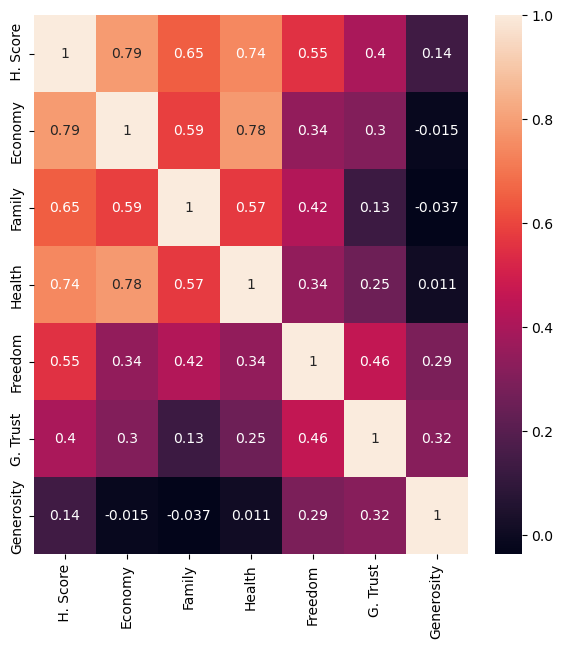

In [91]:
# create s subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7
                        ))

# create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

# Display the heatmap
plt.show()

The heatmap displays the correlations between various factors influencing happiness. Strong positive correlations, such as between "H. Score" and "Economy" (0.79), indicate that economic prosperity is closely associated with happiness. Similarly, "H. Score" has strong positive correlations with "Family" (0.65) and "Health" (0.74), suggesting these factors significantly contribute to happiness. Moderate correlations, such as between "Freedom" and "G. Trust" (0.46), highlight associations between societal trust and freedom. Weak correlations, like "Generosity" with most variables (close to 0), suggest minimal impact. Overall, economic, social, and health factors play a prominent role in happiness levels.

## Question 4

### Scatterplot for H. Score and Economy (0.79)

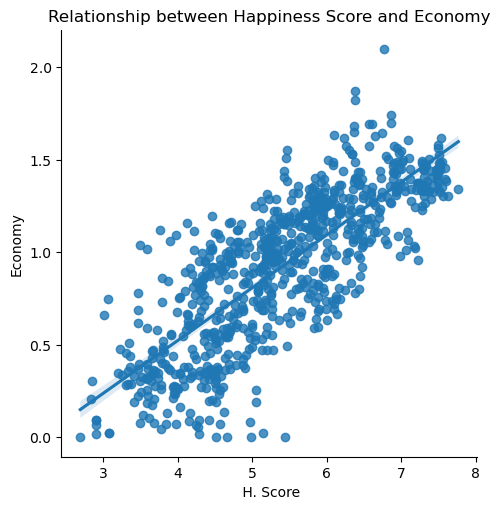

In [115]:
# create scatterplot for the 'H. Score' and Economy columns in seaborn
H_Score_vs_Econ_Scatplot = sns.lmplot(x=' H. Score', y='Economy', data=df)

# Add a title
plt.title("Relationship between Happiness Score and Economy")

# Show the plot
plt.show()


In [120]:
# export chart
H_Score_vs_Econ_Scatplot.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'hscore_vs_econ_scatplot.png'))

The scatterplot shows a positive relationship between Happiness Score and Economy—countries with stronger economies generally report higher happiness scores. While most data points follow this trend, a few outliers stand out. Some countries with strong economies report lower happiness, possibly due to inequality or instability, while others with weaker economies show higher happiness, perhaps driven by social or cultural factors. These outliers highlight that economic strength, while important, isn’t the only driver of happiness.

### Scatterplot for H:Score and Family (0.65)

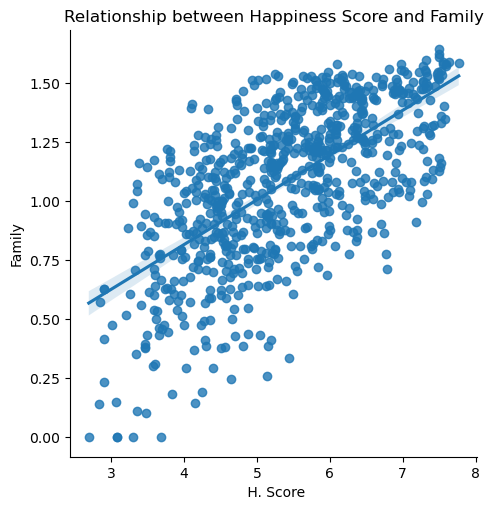

In [124]:
# create scatterplot for the 'H. Score' and Economy columns in seaborn
hscore_vs_fam_scatplot = sns.lmplot(x=' H. Score', y='Family', data=df)

# Add a title
plt.title("Relationship between Happiness Score and Family")

# Show the plot
plt.show()

In [126]:
# export chart
hscore_vs_fam_scatplot.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'hscore_vs_fam_scatplot.png'))

The scatterplot shows a positive relationship between Happiness Score and Family—countries with stronger family support systems generally report higher happiness scores. Most data points cluster closely around the trend line, suggesting a strong connection. However, a few outliers are visible.

Some countries with strong family support report lower happiness, which might be influenced by other challenges like economic instability or health issues. Similarly, some countries with weaker family support still report relatively high happiness, possibly due to cultural resilience or other social factors. These outliers emphasize that while family support is a significant contributor to happiness, it is not the only factor at play.

### Scatterplot for H.Score and Health (0.74)

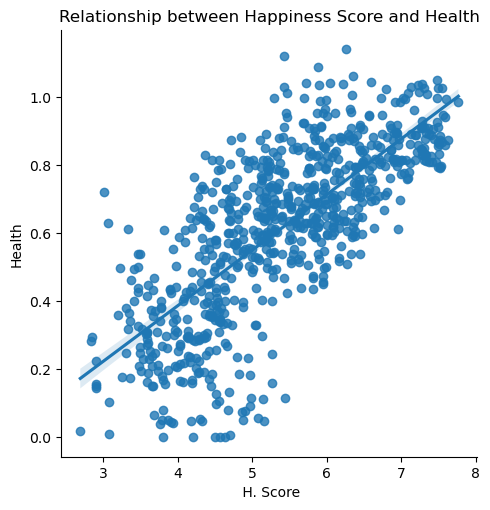

In [134]:
# create scatterplot for the 'H. Score' and Economy columns in seaborn
hscore_vs_health_scatplot = sns.lmplot(x=' H. Score', y='Health', data=df)

# Add a title
plt.title("Relationship between Happiness Score and Health")

# Show the plot
plt.show()

In [136]:
# export chart
hscore_vs_health_scatplot.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'hscore_vs_health_scatplot.png'))

The scatterplot shows a strong positive relationship between Happiness Score and Health—countries with better health outcomes tend to report higher happiness scores. Most data points closely follow the trend line, indicating a significant correlation.

However, a few outliers are present. Some countries with good health scores report lower happiness, possibly due to economic or social challenges. Conversely, some countries with poorer health outcomes still report relatively high happiness, perhaps due to cultural factors or strong community support. These outliers suggest that while health is a key factor in happiness, other variables also play an important role.

### Scatteplot for H. Score and Freedom (0.55)

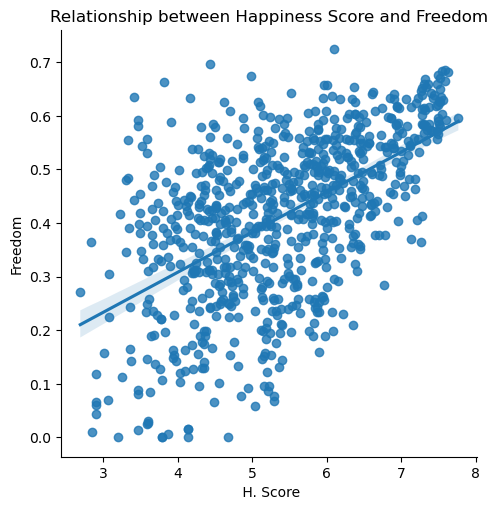

In [140]:
# create scatterplot for the 'H. Score' and Economy columns in seaborn
hscore_vs_freedom_scatplot = sns.lmplot(x=' H. Score', y='Freedom', data=df)

# Add a title
plt.title("Relationship between Happiness Score and Freedom")

# Show the plot
plt.show()

In [142]:
# export chart
hscore_vs_freedom_scatplot.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'hscore_vs_freedom_scatplot.png'))

The scatterplot shows a positive relationship between Happiness Score and Freedom—countries with higher levels of perceived freedom tend to report higher happiness scores. While many points cluster near the trend line, indicating a moderate to strong relationship, the spread of the data is wider compared to some other variables like health.

Some outliers exist, with countries having high freedom but relatively low happiness or vice versa. These deviations may reflect the influence of other factors, such as economic or social challenges, that impact happiness. While freedom is an important factor, the wider spread of points suggests that it interacts with other variables in determining happiness.

### Scatterplot for Economy and Health (0.78)

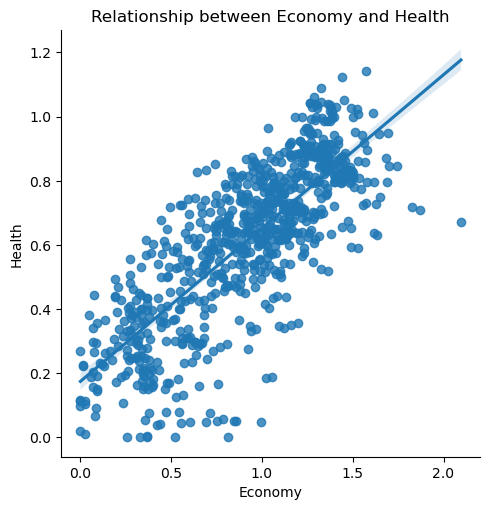

In [149]:
# create scatterplot for the 'H. Score' and Economy columns in seaborn
econ_vs_health_scatplot = sns.lmplot(x='Economy', y='Health', data=df)

# Add a title
plt.title("Relationship between Economy and Health")

# Show the plot
plt.show()

In [151]:
# export chart
econ_vs_health_scatplot.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'econ_vs_health_scatplot.png'))

The scatterplot shows a strong positive relationship between Economy and Health—countries with stronger economies tend to have better health outcomes. The points are tightly clustered around the trend line, indicating a very strong linear relationship between the two variables.

Outliers are minimal but present, with a few countries having either strong economies but lower health scores or weaker economies but higher health scores. Overall, the close alignment of points with the trend line highlights the strong connection between economic strength and health outcomes.

### Scatterplot for Economy and Family (0.59)

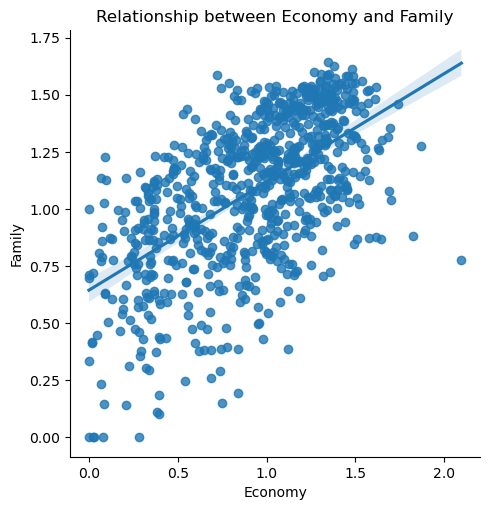

In [158]:
# create scatterplot for the 'H. Score' and Economy columns in seaborn
econ_vs_family_scatplot = sns.lmplot(x='Economy', y='Family', data=df)

# Add a title
plt.title("Relationship between Economy and Family")

# Show the plot
plt.show()

In [160]:
# export chart
econ_vs_family_scatplot.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'econ_vs_family_scatplot.png'))

The scatterplot shows a positive relationship between Economy and Family—countries with stronger economies tend to report higher levels of family support. The points are moderately clustered around the trend line, indicating a reasonably strong relationship, although there is some variability.

Outliers are visible, with some countries having high economic scores but lower family support, possibly due to cultural or societal differences. Conversely, a few countries with lower economic scores exhibit relatively high family support, which may reflect cultural values prioritizing family connections. Overall, while the trend indicates a connection between economic strength and family support, the spread of points suggests that other factors also influence family support.

## Question 5

### Pair Plot for Entire Dataframe

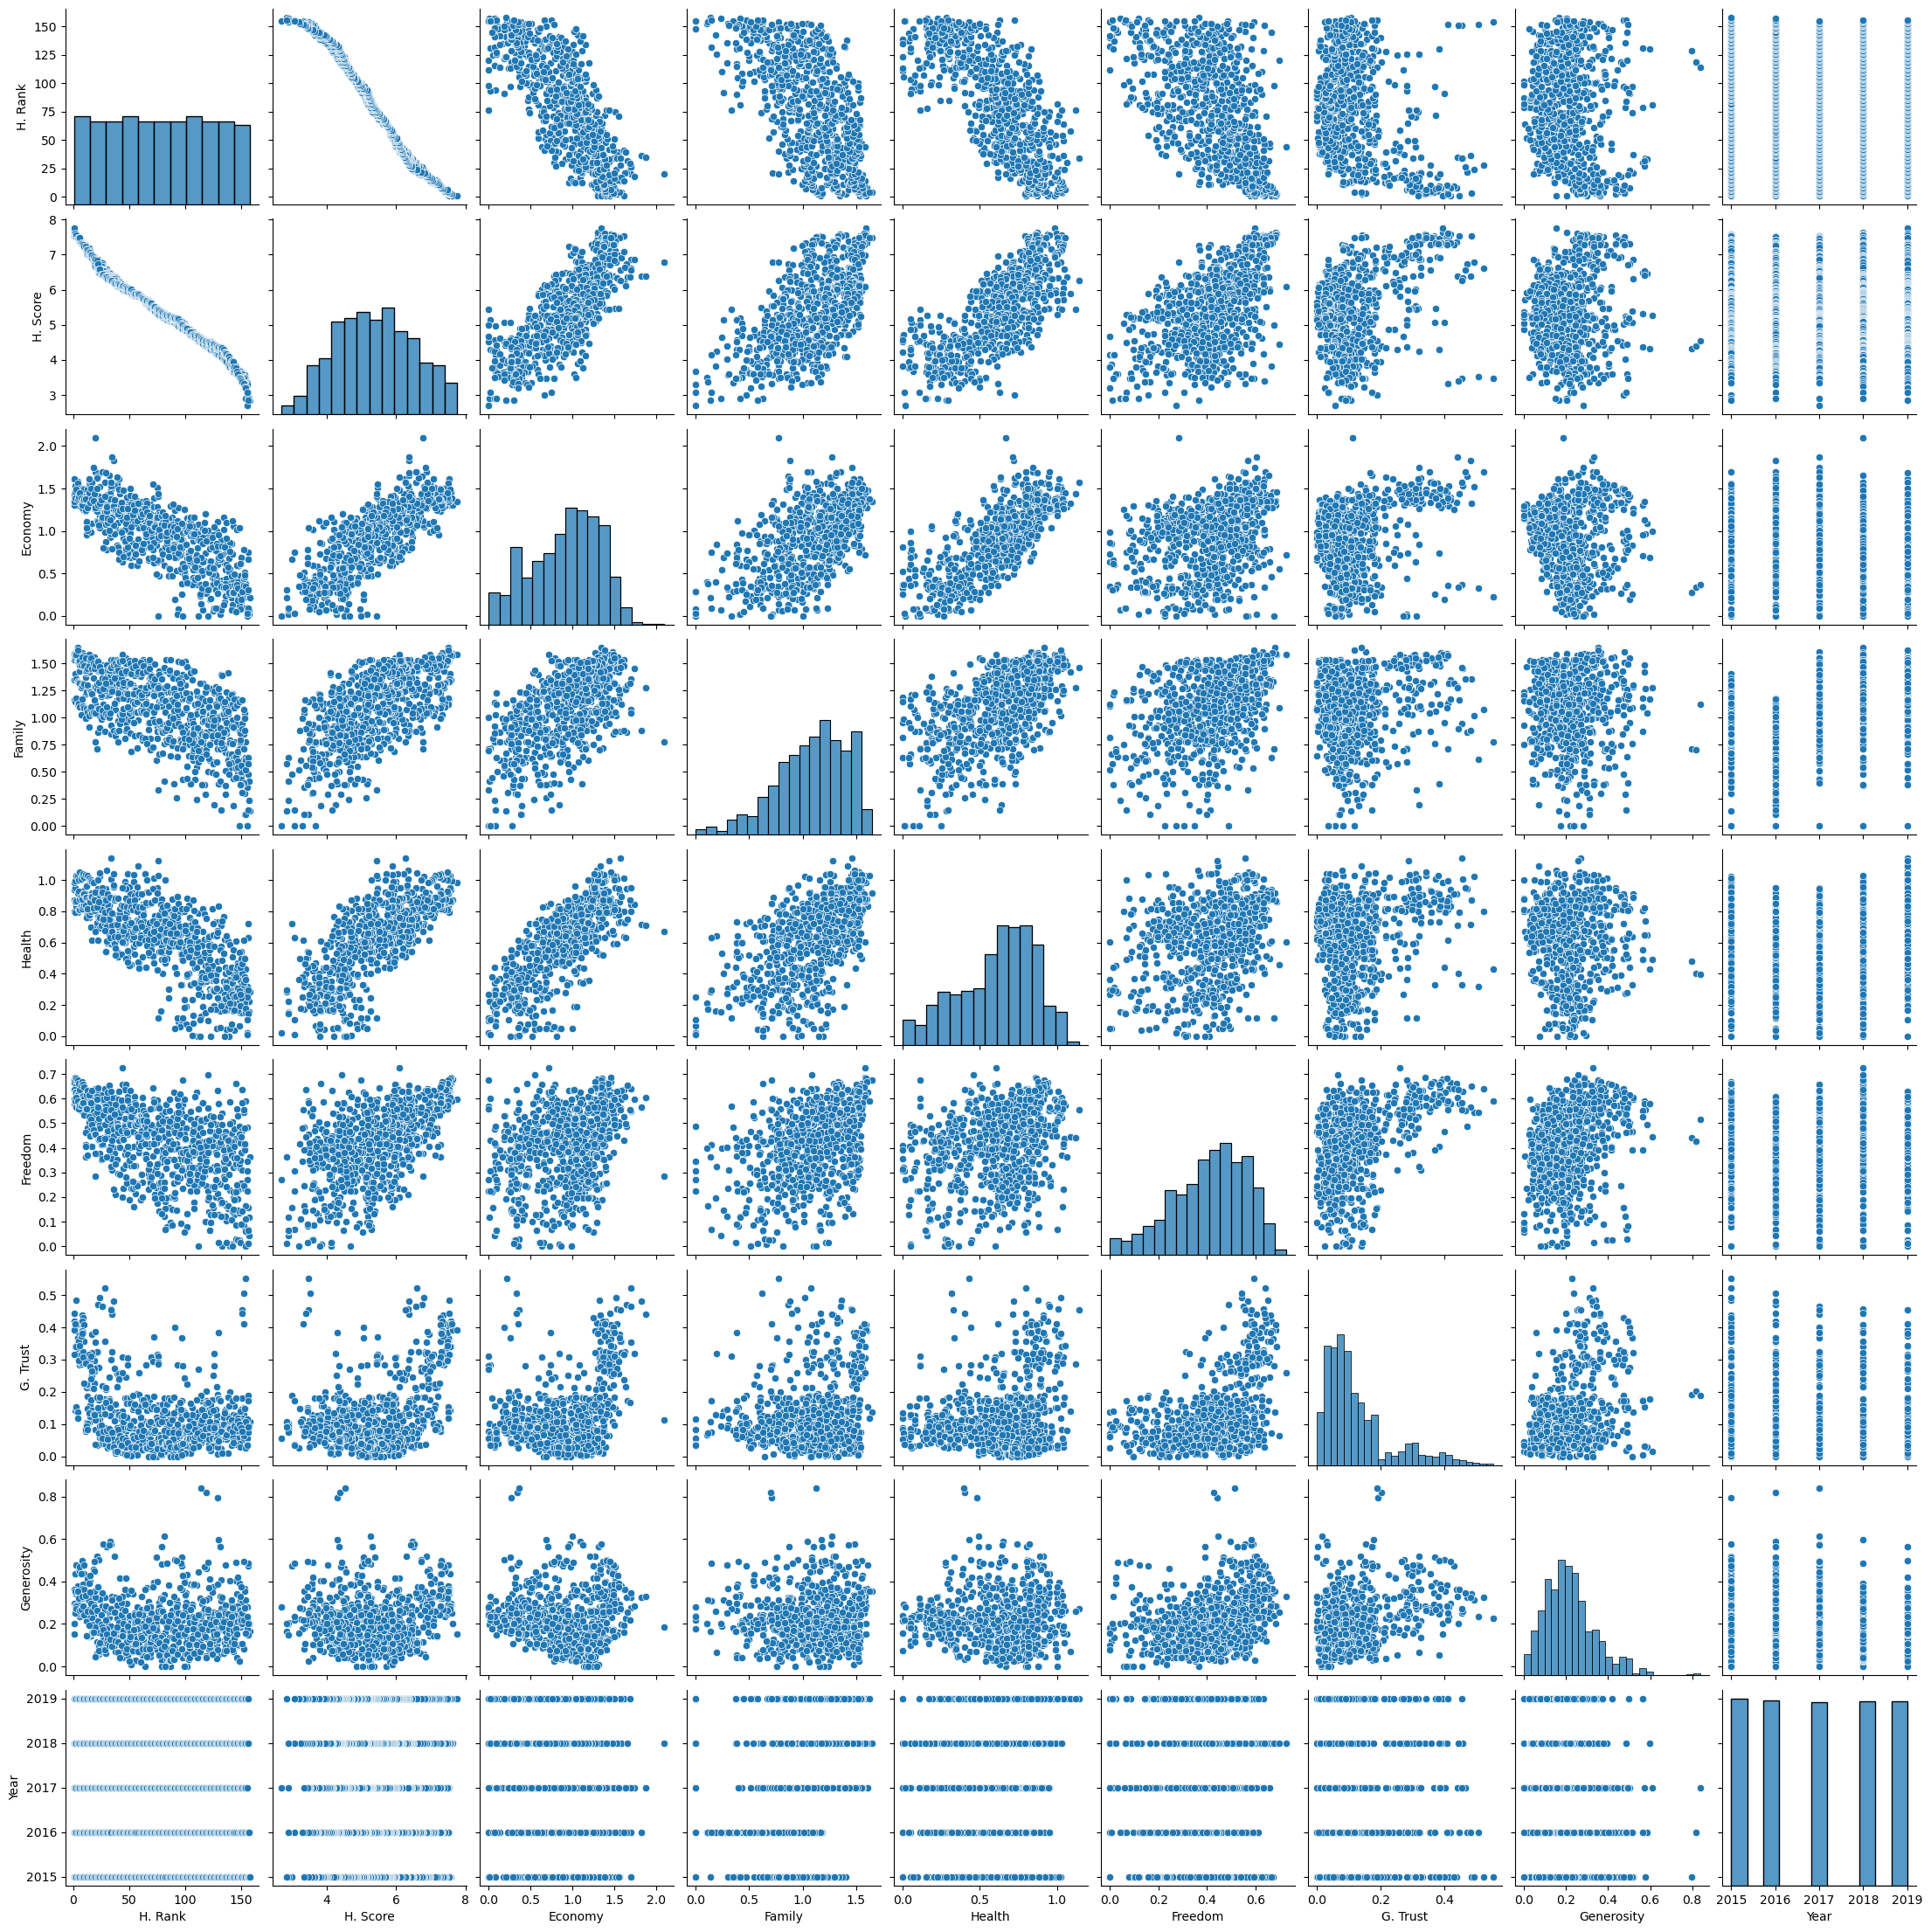

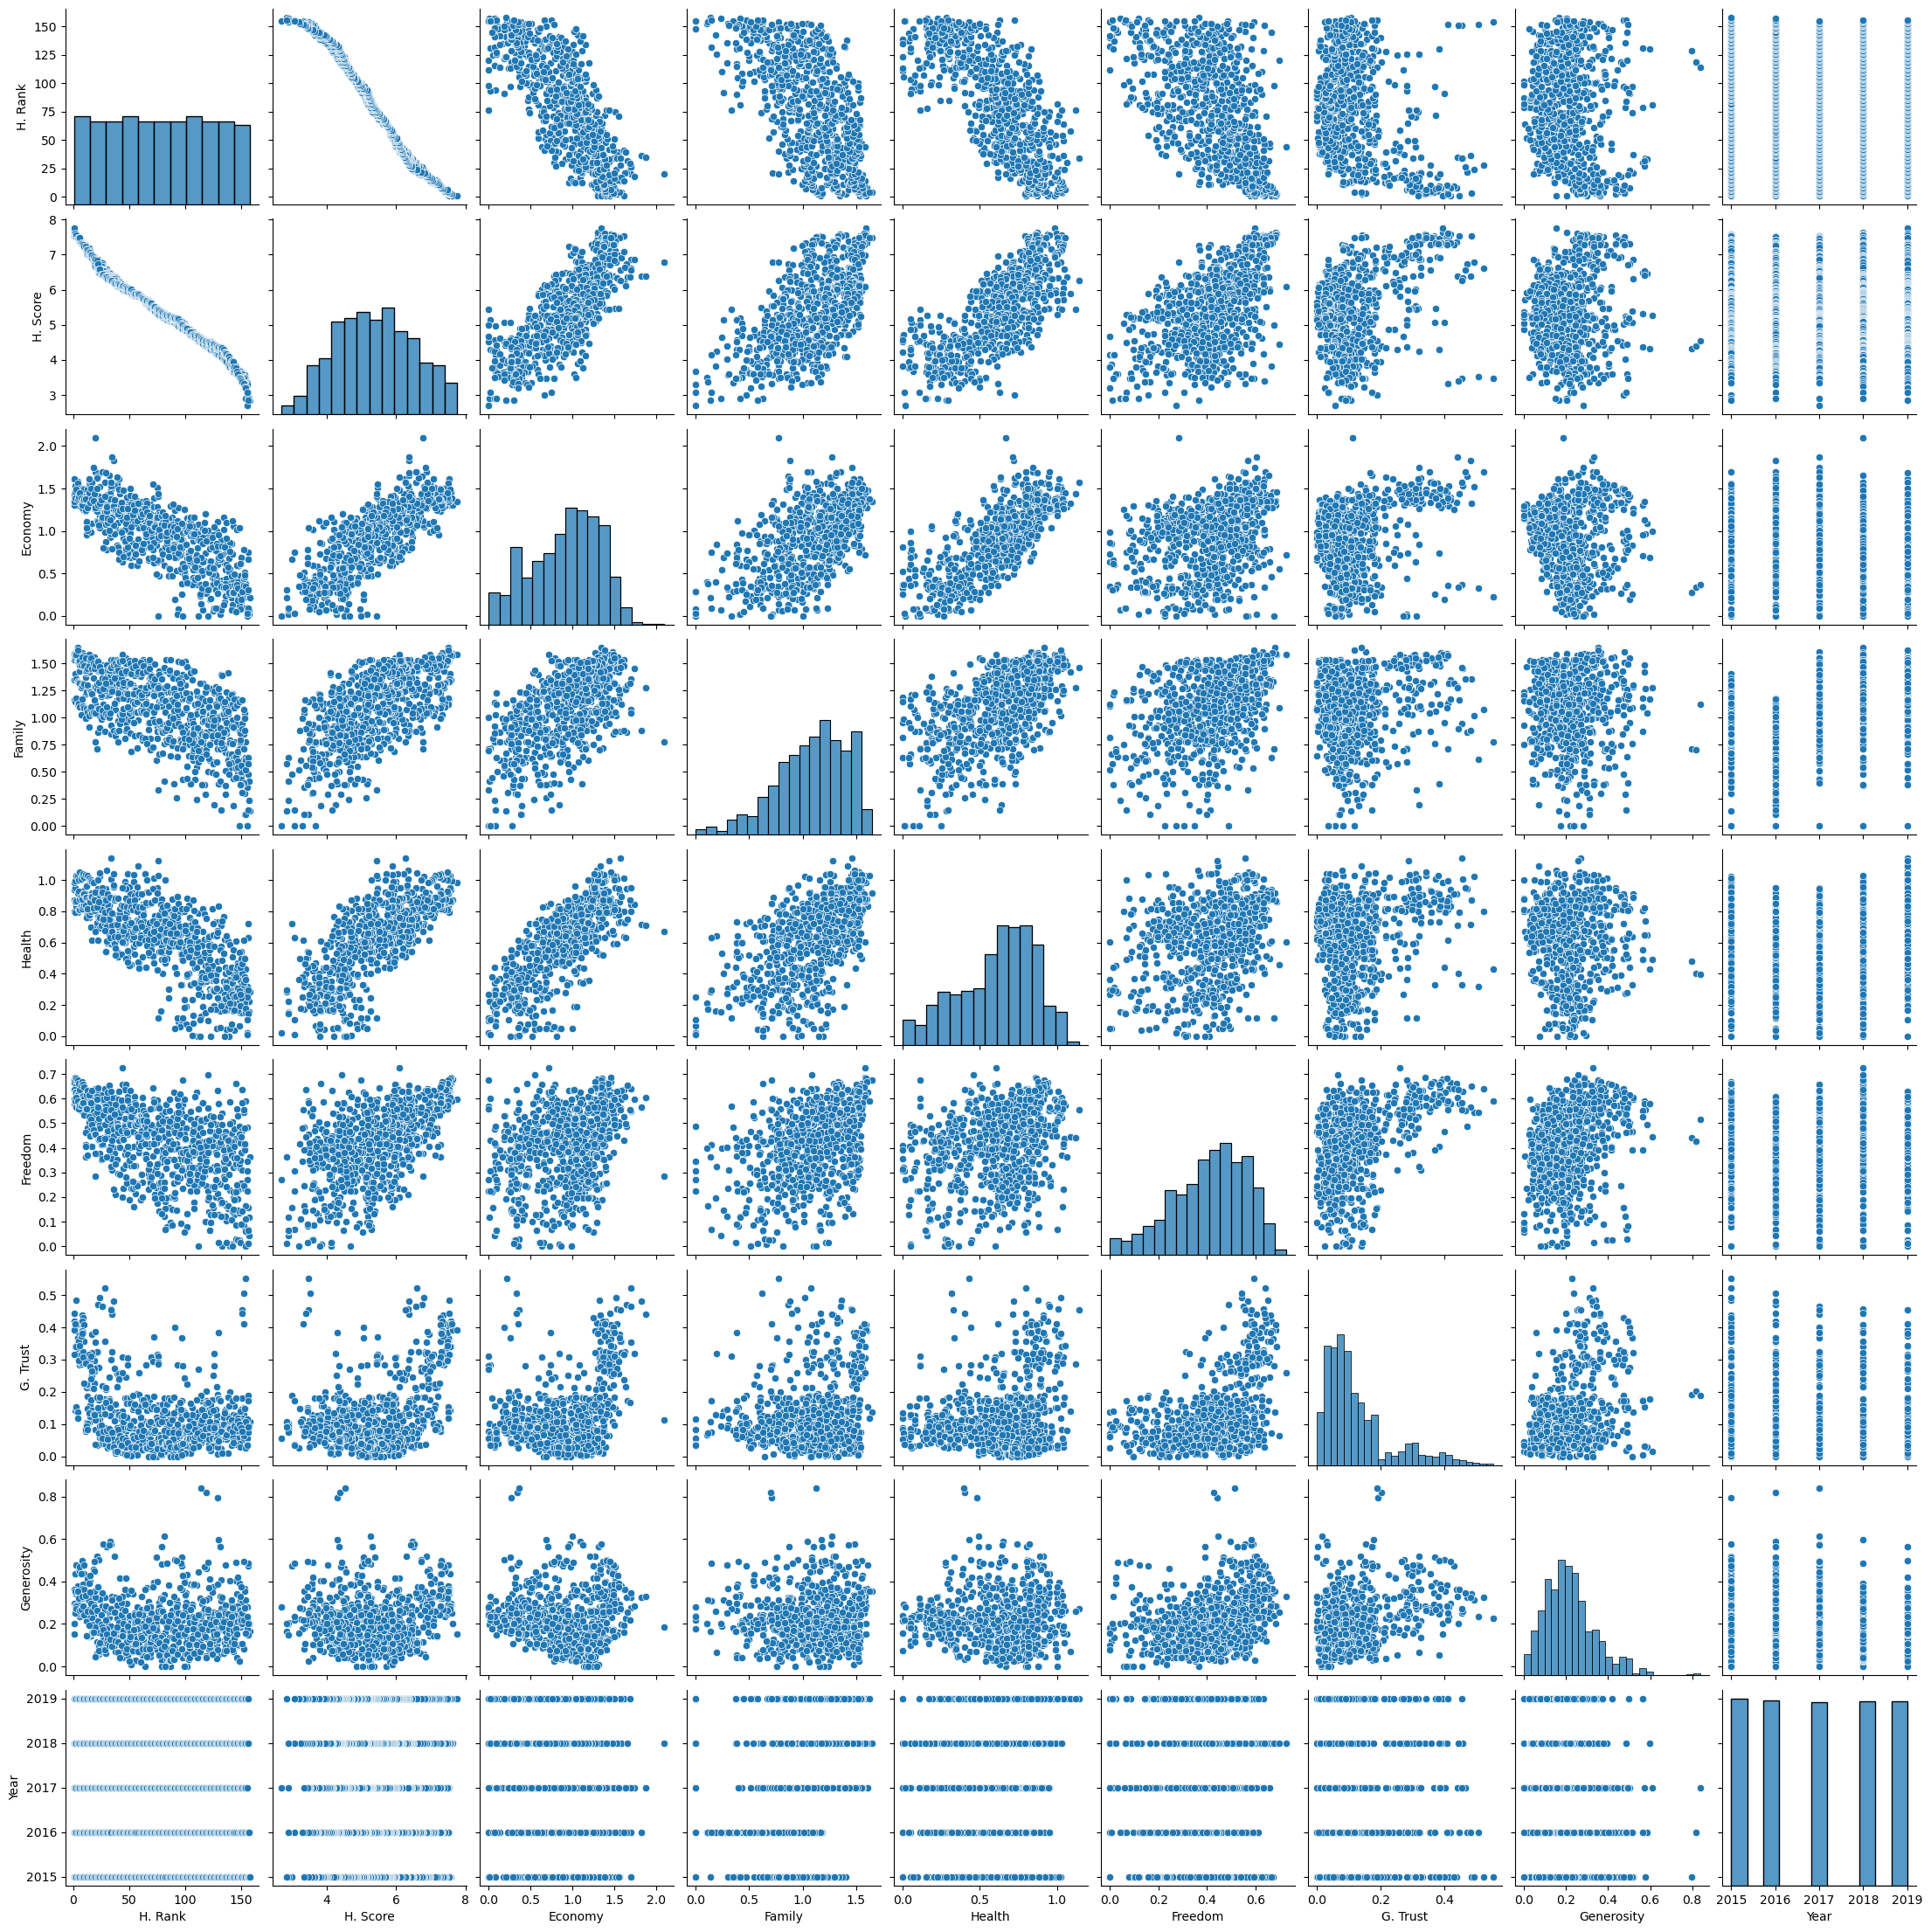

In [41]:
# create pair plot
pair_plot_df = sns.pairplot(df)

# Show the plot
plt.show()

In [43]:
# export chart
pair_plot_df.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'pair_plot_df.png'))


The pair plot reveals interesting patterns in the data, particularly in the distribution of the variables. Some variables show uniform distributions, while others exhibit a bell-shaped or normal distribution, like "Family" and "Health." A few variables, such as "Trust," appear heavily skewed, with most values concentrated near zero. This suggests variability in trust levels, which could be an intriguing area to explore further. The scatterplots highlight some clear relationships between variables, such as a potential positive correlation between "Economy" and "Health," where higher economic performance might align with better health outcomes. Other scatterplots show no obvious patterns, suggesting no significant relationships between certain pairs of variables.

One variable that stands out for deeper exploration is "Trust," given its skewed distribution and potential implications for social or economic factors. Similarly, "Health" and "Economy" show a promising relationship worth investigating, as they may be key contributors to overall well-being. "Family" also merits attention due to its relatively normal distribution and likely impact on variables like "Happiness Score."

## Question 6

### Categorical Plot for Region and Happiness

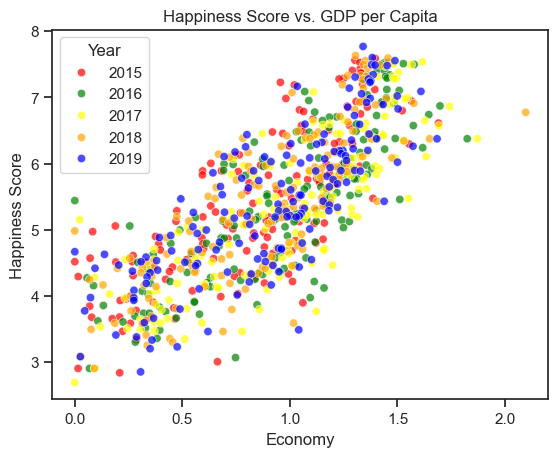

In [87]:
# Define a custom color palette
custom_palette = ['red', 'green', 'yellow', 'orange', 'blue']

# create cat plot
reg_vs_hscore_cat = sns.scatterplot(
    x='Economy', 
    y='H. Score', 
    hue='Year',  
    data=df, 
    sizes=(20, 200), 
    alpha=0.7,
      palette=custom_palette 
)

plt.title("Happiness Score vs. GDP per Capita")
plt.xlabel("Economy")
plt.ylabel("Happiness Score")
plt.legend(title="Year")
plt.show()

# Save the plot
output_path = os.path.join(path, 'Analysis', 'Visualisations', 'reg_vs_hscore_cat.png')
plt.gcf().savefig(output_path)


This scatter plot shows the relationship between happiness and GDP per capita across different countries from 2015 to 2019. Each dot represents a country, with colors distinguishing the years. You can see a clear positive relationship—countries with higher GDP per capita generally report higher happiness scores. This trend is consistent across all five years, which suggests that economic prosperity plays an important role in how happy people feel.

That said, the data also shows quite a bit of variation. At any given level of GDP per capita, happiness scores vary, meaning other factors beyond money contribute to happiness. Most countries cluster in the middle ranges of both GDP and happiness, but there are outliers—some countries with high GDPs don’t report as much happiness, while others achieve higher happiness despite having lower GDPs. Overall, this chart highlights that while money matters, it’s not the whole story when it comes to happiness.